In [1]:
#Running data cleaning python notebook

%run 01_data-ingest-cmap.ipynb

In [2]:
# !pip install --upgrade --force-reinstall shapely


## looking for relationshiops between all variables

In [51]:
import seaborn

/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_96474/2889856059.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap(covari_floats.corr().abs(),


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'Fe'),
  Text(1.5, 0, 'NO3NO2'),
  Text(2.5, 0, 'PO4'),
  Text(3.5, 0, 'Satellite_CHL'),
  Text(4.5, 0, 'SiO4'),
  Text(5.5, 0, 'biomass'),
  Text(6.5, 0, 'date'),
  Text(7.5, 0, 'lat'),
  Text(8.5, 0, 'lon'),
  Text(9.5, 0, 'salin'),
  Text(10.5, 0, 'temp')])

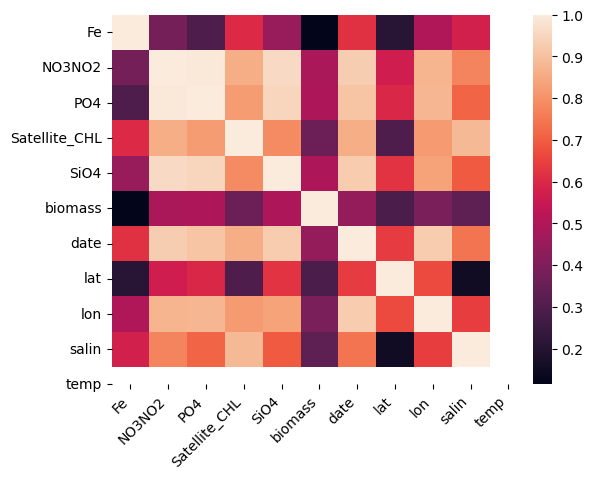

In [52]:
covari_floats = covari[covari.columns.difference(['time', 'cruisename', 'PopulationName', 'SizeClass'])]


seaborn.heatmap(covari_floats.corr().abs(),
                xticklabels=covari_floats.columns,
                yticklabels=covari_floats.columns)
plt.xticks(rotation=45, ha='right') #roating the xticks to make it easier to read

#plt.sup_title('Correlation of Features')

In [53]:
corvari_corr = covari_floats.corr().abs().unstack()
corvari_corr = corvari_corr.sort_values(kind="quicksort")

print(corvari_corr[corvari_corr.between(0.5, 0.99)])

lon            NO3NO2           0.564313
NO3NO2         lon              0.564313
temp           Fe               0.575928
Fe             temp             0.575928
lon            PO4              0.595871
PO4            lon              0.595871
Satellite_CHL  Fe               0.601186
Fe             Satellite_CHL    0.601186
               lat              0.616911
lat            Fe               0.616911
SiO4           lon              0.621488
lon            SiO4             0.621488
lat            lon              0.637244
lon            lat              0.637244
salin          temp             0.642609
temp           salin            0.642609
salin          lon              0.665494
lon            salin            0.665494
SiO4           temp             0.693122
temp           SiO4             0.693122
PO4            temp             0.712132
temp           PO4              0.712132
lat            temp             0.742634
temp           lat              0.742634
NO3NO2         t

/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_96474/3766957071.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corvari_corr = covari_floats.corr().abs().unstack()


In [54]:
# ## Having trouble with this aswell, cannot find any online resources to help
# import seaborn
# list_columns = ['PopulationName', 'CellAbundance_10^6_cells_per_L',
#        'Biomass_pgC_per_L', 'CellQuotas_fgC_per_cell',
#        'CellDiameter_micrometer', 'Salinity_psu', 'Temperature_degC',
#        'Light_micromolQuanta_m2_s', 'SiO4_micromol_per_L',
#        'NO3NO2_micromol_per_L', 'PO4_micromol_per_L', 'Fe_micromol_per_L',
#        'SatelliteCHL_microgra mCHL_per_L', 'MixedLayerDepth_m']
# corr_plot = covari[list_columns]
# seaborn.pairplot(corr_plot, hue='PopulationName')


## Mapping all of the cruise tracts

#### First starting with all data (NaN values included)

In [55]:
# import seaborn as sns
# import pandas as pd
# import geopandas as gpd
# from geopandas import GeoSeries, GeoDataFrame

# # Create starting cruise tracks df that contains Nans
# cruise_tracks = covari_nans.reset_index()[['date', 'lat', 'lon', 'cruisename']]

# #creating a geometry dataframe to map in geopandas
# from shapely.geometry import Point
#         #list comperehension
# geometry = [Point(xy) for xy in zip(cruise_tracks['lon'],
#                                     cruise_tracks['lat'])]

# gdf = GeoDataFrame(cruise_tracks, geometry=geometry, crs=3857)

# # Load the world map shapefile using GeoPandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Create a GeoPandas plot of the world map
# fig, ax = plt.subplots(figsize=(10, 6))
# world.boundary.plot(ax=ax, linewidth=0.5, color='k')  # plot the world map boundaries

# bounds = gdf.geometry.bounds

# ax.set_xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
# ax.set_ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

# ax.set_title('Countries and Ocean Basins')

# gdf.plot(column='cruisename', legend=True, linewidth=0.2, ax=ax)
# # Set the background color of the plot to white
# ax.set_facecolor('white')

# # Set the title and labels for the plot
# ax.set_title('Avaliable Cruises Map')
# ax.set_xlabel('Longitude (º)')
# ax.set_ylabel('Latitude (º)')

# # Show the plot
# plt.show()

## Creating a map of the cruises without Nan values

In [56]:
def cruise_tract(dataframe):
    import seaborn as sns
    import pandas as pd
    import geopandas as gpd
    from geopandas import GeoSeries, GeoDataFrame

    # Create starting cruise tracks df that contains Nans
    cruise_tracks = dataframe.reset_index()[['date', 'lat', 'lon', 'cruisename']]

    #creating a geometry dataframe to map in geopandas
    from shapely.geometry import Point
            #list comperehension
    geometry = [Point(xy) for xy in zip(cruise_tracks['lon'],
                                        cruise_tracks['lat'])]

    gdf = GeoDataFrame(cruise_tracks, geometry=geometry, crs=3857)

    # Load the world map shapefile using GeoPandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Create a GeoPandas plot of the world map
    fig, ax = plt.subplots(figsize=(10, 6))
    world.boundary.plot(ax=ax, linewidth=0.5, color='k')  # plot the world map boundaries

    bounds = gdf.geometry.bounds

    ax.set_xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
    ax.set_ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

    ax.set_title('Countries and Ocean Basins')

    gdf.plot(column='cruisename', legend=True, linewidth=0.2, ax=ax)
    # Set the background color of the plot to white
    ax.set_facecolor('white')

    # Set the title and labels for the plot
    ax.set_title('Cruises with no NaN Values')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Show the plot
    plt.show()
    

In [57]:
covari

,date,PopulationName,lat,lon,biomass,salin,temp,cruisename,NO3NO2,PO4,Fe,SiO4,Satellite_CHL
0,2016-04-20 07:00:00,Prochlorococcus,21.520326,-158.326984,10.520443,34.893785,24.351745,KOK1606,8.033585e-07,0.346238,0.000083,10.145326,0.035360
1,2016-04-20 07:00:00,Synechococcus,21.520326,-158.326984,0.341429,34.893785,24.351745,KOK1606,8.033585e-07,0.346238,0.000083,10.145326,0.035360
2,2016-04-20 07:00:00,non_pro_syn,21.520326,-158.326984,3.338212,34.893785,24.351745,KOK1606,8.033585e-07,0.346238,0.000083,10.145326,0.035360
3,2016-04-20 07:00:00,non_pro_syn,21.520326,-158.326984,0.701902,34.893785,24.351745,KOK1606,8.033585e-07,0.346238,0.000083,10.145326,0.035360
4,2016-04-20 08:00:00,Prochlorococcus,21.662710,-158.323430,9.309387,34.902376,24.339265,KOK1606,8.033585e-07,0.346238,0.000083,10.145326,0.035360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,2019-04-29 16:00:00,non_pro_syn,23.491830,-158.000200,1.678707,35.055113,24.506250,KM1906,5.329380e-07,0.339759,0.000076,11.717394,0.033119
6897,2019-04-29 17:00:00,Prochlorococcus,23.295040,-158.001120,6.017184,35.061772,24.780297,KM1906,5.329380e-07,0.339759,0.000076,11.717394,0.033119
6898,2019-04-29 17:00:00,Synechococcus,23.295040,-158.001120,0.558076,35.061772,24.780297,KM1906,5.329380e-07,0.339759,0.000076,11.717394,0.033119
6899,2019-04-29 17:00:00,non_pro_syn,23.295040,-158.001120,2.741156,35.061772,24.780297,KM1906,5.329380e-07,0.339759,0.000076,11.717394,0.033119


In [58]:
def cruise_tract(dataframe):
    import seaborn as sns
    import pandas as pd
    import geopandas as gpd
    from geopandas import GeoSeries, GeoDataFrame

    # Create starting cruise tracks df that contains Nans
    cruise_tracks = dataframe.reset_index()[['date', 'lat', 'lon', 'cruisename']]

    #creating a geometry dataframe to map in geopandas
    from shapely.geometry import Point
            #list comperehension
    geometry = [Point(xy) for xy in zip(cruise_tracks['lon'],
                                        cruise_tracks['lat'])]

    gdf = GeoDataFrame(cruise_tracks, geometry=geometry, crs=3857)

    # Load the world map shapefile using GeoPandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Create a GeoPandas plot of the world map
    fig, ax = plt.subplots(figsize=(10, 6))
    world.boundary.plot(ax=ax, linewidth=0.5, color='k')  # plot the world map boundaries

    bounds = gdf.geometry.bounds

    ax.set_xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
    ax.set_ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

    ax.set_title('Countries and Ocean Basins')

    gdf.plot(column='cruisename', legend=True, linewidth=0.2, ax=ax)
    # Set the background color of the plot to white
    ax.set_facecolor('white')

    # Set the title and labels for the plot
    ax.set_title('Cruises with no NaN Values')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Show the plot
    plt.show()
    

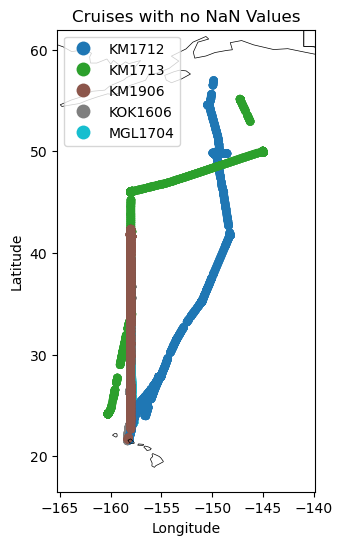

In [59]:
cruise_tract(covari)